<a href="https://colab.research.google.com/github/mhmmdmin/Assignment/blob/main/Assignment_Day_8_Muhammad_Amin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Welcome to Day 8 - Homework!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving housepricesdata.csv to housepricesdata (1).csv


In [ ]:
df = pd.read_csv('housepricesdata.csv')

In [ ]:
df


,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price
0,Taman Sari Semanggi Apartment 1BR Tower A,1,1,Semanggi,Jakarta Selatan,106.819159,-6.226598,1,43.0,Tower A,23,IDR,96000000
1,Puri Park View Apartment 2BR Semi Furnished,2,1,Kebon Jeruk,Jakarta Barat,106.756061,-6.192081,0,35.0,Tower CB,19,IDR,30000000
2,Metro Park Residence 2BR Fully Furnished,2,1,Kedoya,Jakarta Barat,106.757651,-6.186415,1,53.0,Tower Milan,22,IDR,70000000
3,Pondok Indah Golf Apartment 2BR View Golf Area,2,2,Pondok Indah,Jakarta Selatan,106.784600,-6.272637,1,85.0,Tower -,24,IDR,576000000
4,Season City Apartment 2BR Tower C,2,1,Grogol,Jakarta Barat,106.796056,-6.153652,0,48.0,Tower C,15,IDR,32000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5298,Grand Centerpoint Apartment 2BR View pool,2,1,Pekayon,Bekasi,106.993400,-6.243400,1,36.0,Tower c,14,IDR,36000000
5299,Roseville SOHO & Suites Studio Fully Furnished,0,1,BSD City,Tangerang,106.664000,-6.294400,1,32.0,Tower East,16,IDR,60000000
5300,Setiabudi Residence 2BR Fully Furnished,2,1,Setiabudi,Jakarta Selatan,106.829330,-6.216540,1,83.0,Tower B,21,IDR,250000000
5301,Apartemen Semanggi 2BR Tower 1,2,1,Slipi,Jakarta Pusat,106.801738,-6.202296,1,68.0,Tower 1,24,IDR,108000000


Penjelasan:
1. Unit_Name: Nama Unit Apartmen
2. No_Rooms: Jumlah bedrooms
3. Bathroom: Jumlah kamar mandi
4. Locality: Daerah
5. Region: Kota/Kabupaten
6. Longitude dan Latitude: letak geografis
7. Furnished: 1 jika fully furnished, 0 jika non-furnished
8. Area: Luas
9. Tower: Lokasi Tower
10. Total_Facilities: Jumlah Total Fasilitas
11. Currency: Mata Uang (USD/IDR)
12. Annual_Price: Harga sewa tahunan (sesuai mata uang)

### Soal:

1. Perhatikan kolom 'Currency' dan 'Annual_Price'. Buatlah kolom baru bernama `CleanedPrice`. Kolom ini dibuat berdasarkan informasi dari 'Annual_Price' dan 'Currency', sehingga harga sewa tahunan di `CleanedPrice` memiliki mata uang yang sama, yaitu IDR (Rupiah). Gunakan Asumsi 1 USD = 15 000 IDR.

2. Analisalah kolom 'No_Rooms' dan 'CleanedPrice'. Buat visualisasi yang menurut Anda sesuai. Apakah ada kejanggalan? Jika ya, nyatakanlah apa yang membuat data-data tersebut janggal. Kemudian, perbaikilah (jika hal tersebut dapat dilakukan). Jika Anda tidak memilih untuk memperbaikinya, maka apa yang sebaiknya dilakukan pada baris-baris tersebut? 

3. Analisalah kolom 'Longitude' dan 'Latitude'. Apakah ada outlier? Jika ya, nyatakanlah apa yang membuat data-data tersebut outlier. Apakah outlier-outlier pada kolom `Longitude` merupakan sesuatu yang bisa dijelaskan (masuk akal), atau tidak? Jelaskan. 

4. Apakah outlier-outlier pada kolom `Latitude` merupakan sesuatu yang bisa dijelaskan (masuk akal)? Jelaskan.

5. Buatlah simple Linear Regression dengan ketentuan berikut:
    - Kolom prediktor: `Area`, `Total_Facilities`, `No_Rooms`
    - Kolom target: `CleanedPrice`
    - Train Test Split dilakukan dengan 80% Train, 20% Test
    - Laporkanlah RMSE dan R2 Score dari model yang kalian buat, jika dievaluasi pada Test Set. 

### Nomor 1:

Hal pertama yang saya lakukan untuk menjawab soal no. 1 adalah memperhatikan info data secara keseluruhan.

Setelah saya amati, hanya ada 1 kolom yang missing di kolom Unit_Name. Sedangkan yang lain terisi semua.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5303 entries, 0 to 5302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unit_Name         5302 non-null   object 
 1   No_Rooms          5303 non-null   int64  
 2   Bathroom          5303 non-null   int64  
 3   Locality          5303 non-null   object 
 4   Region            5303 non-null   object 
 5   Longitude         5303 non-null   float64
 6   Latitude          5303 non-null   float64
 7   Furnished         5303 non-null   int64  
 8   Area              5303 non-null   float64
 9   Tower             5303 non-null   object 
 10  Total_Facilities  5303 non-null   int64  
 11  Currency          5303 non-null   object 
 12  Annual_Price      5303 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 538.7+ KB


Saya kemudian memastikan lagi sebagai validasi asumsi saya di awal tadi setelah melihat info data secara keseluruhan.

In [ ]:
df.columns[df.isna().any()].tolist()


['Unit_Name']

Kemudian, saya melanjutkan mencari kolom yang memiliki missing value tersebut untuk mencari tahu apakah kolom tersebut akan mempengaruhi data secara keseluruhan nantinya.

Dan hasilnya saya menemukan bahwa kolom tersebut tidak akan mempengaruhi data secara keseluruhan karena hanya 1 kolom saja dan juga hanya Unit_Name saja jadi bisa kita abaikan untuk menjawab soal no 1 ini.

In [ ]:
df[df['Unit_Name'].isnull()]

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price
1491,NaN,2,2,Thamrin,Jakarta Pusat,106.818654,-6.194443,1,74.0,Tower Cosmo Mansion,21,IDR,120000000


Karena di soal no.1 ini ada menyebutkan bahwa ada Currency selain IDR maka saya mencoba untuk melakukan validasi dengan cara sederhana seperti di bawah ini.

Hasilnya benar, ada 2 Currency yaitu IDR dan juga USD.

In [ ]:
df['Currency'].unique()

array(['IDR', 'USD'], dtype=object)

Kemudian, saya diminta untuk membuat kolom baru dengan nama CleanedPrice yang mana kolom tersebut diminta untuk diisi dengan currency dalam IDR semua.
Jadi saya harus mengubah currency USD ke IDR dengan mengalikan kolom Annual_Price dengan 15000 untuk mendapatkan hasil currency IDRnya.

Cara saya menjawab soal no. 1 adalah demikian. Dengan membuat kondisi dan menggunakan numpy select untuk mendapatkan hasil yang diinginkan pada kolom CleanedPrice.

In [ ]:
condition = [
    df['Currency'] == "USD",
    df['Currency'] == "IDR"
]

values = [
    df['Annual_Price'] * 15000,
    df['Annual_Price'] * 1
]

df['CleanedPrice'] = np.select(condition, values)

In [ ]:
df

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
0,Taman Sari Semanggi Apartment 1BR Tower A,1,1,Semanggi,Jakarta Selatan,106.819159,-6.226598,1,43.0,Tower A,23,IDR,96000000,96000000
1,Puri Park View Apartment 2BR Semi Furnished,2,1,Kebon Jeruk,Jakarta Barat,106.756061,-6.192081,0,35.0,Tower CB,19,IDR,30000000,30000000
2,Metro Park Residence 2BR Fully Furnished,2,1,Kedoya,Jakarta Barat,106.757651,-6.186415,1,53.0,Tower Milan,22,IDR,70000000,70000000
3,Pondok Indah Golf Apartment 2BR View Golf Area,2,2,Pondok Indah,Jakarta Selatan,106.784600,-6.272637,1,85.0,Tower -,24,IDR,576000000,576000000
4,Season City Apartment 2BR Tower C,2,1,Grogol,Jakarta Barat,106.796056,-6.153652,0,48.0,Tower C,15,IDR,32000000,32000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5298,Grand Centerpoint Apartment 2BR View pool,2,1,Pekayon,Bekasi,106.993400,-6.243400,1,36.0,Tower c,14,IDR,36000000,36000000
5299,Roseville SOHO & Suites Studio Fully Furnished,0,1,BSD City,Tangerang,106.664000,-6.294400,1,32.0,Tower East,16,IDR,60000000,60000000
5300,Setiabudi Residence 2BR Fully Furnished,2,1,Setiabudi,Jakarta Selatan,106.829330,-6.216540,1,83.0,Tower B,21,IDR,250000000,250000000
5301,Apartemen Semanggi 2BR Tower 1,2,1,Slipi,Jakarta Pusat,106.801738,-6.202296,1,68.0,Tower 1,24,IDR,108000000,108000000


### Nomor 2:

Untuk menganalisa kolom 'No_Rooms' dan 'CleanedPrice', kita bisa menggunakan boxplot.

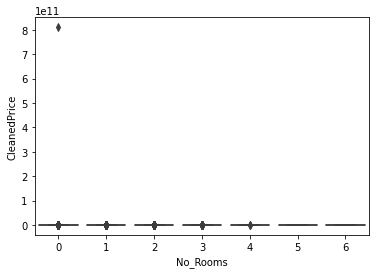

In [ ]:
sns.boxplot(data = df, x = 'No_Rooms', y = 'CleanedPrice')
plt.show()

Bisa terlihat dari boxplot tersebut ada nilai ekstrem yang menyentuh angka 8 M. Nilai tersebut bisa kita telusuri lagi untuk melihat apakah dia nilai ekstrem sendiri atau ada beberapa. Saya mencoba mengurutkan top 5 data sesuai dengan CleanedPrice yang tertinggi ke rendah.

In [ ]:
df.nlargest(n=5 , columns = 'CleanedPrice')

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
1163,Signature Park Grande Studio Fully Furnished,0,1,MT Haryono,Jakarta Timur,106.866201,-6.245201,1,25.0,Tower Green Signature,20,USD,54000000,810000000000
3923,Pakubuwono Residence 4BR Tower CottonWood,4,4,Pakubuwono,Jakarta Selatan,106.786080,-6.236956,1,548.0,Tower CottonWood,24,USD,108000,1620000000
3622,Pacific Place Residence 4BR Semi Furnished,4,5,SCBD,Jakarta Selatan,106.810134,-6.225613,0,500.0,Tower 2,21,IDR,1296000000,1296000000
4395,Essence Darmawangsa Apartment 3BR Tower East,3,3,Dharmawangsa,Jakarta Selatan,106.804426,-6.258746,1,322.0,Tower East,22,IDR,1128000000,1128000000
3611,ST Moritz Apartment 6BR Fully Furnished,6,4,Puri Indah,Jakarta Barat,106.738730,-6.190723,1,576.0,Tower Ambassador,24,IDR,1000000000,1000000000


Hasilnya dapat dilihat bahwa hanya ada 1 data yang berniali 8 Miliar, dan sisanya tidak menyentuh harga tersebut. Maka kita bisa menghapus data tersebut dari data kita karena mungkin Apartemen tersebut untuk kalangan milioner.

In [ ]:
df = df[df['CleanedPrice']<810000000000]
df = df.reset_index(drop=True)
df.nlargest(n=5 , columns = 'CleanedPrice')

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
3922,Pakubuwono Residence 4BR Tower CottonWood,4,4,Pakubuwono,Jakarta Selatan,106.786080,-6.236956,1,548.0,Tower CottonWood,24,USD,108000,1620000000
3621,Pacific Place Residence 4BR Semi Furnished,4,5,SCBD,Jakarta Selatan,106.810134,-6.225613,0,500.0,Tower 2,21,IDR,1296000000,1296000000
4394,Essence Darmawangsa Apartment 3BR Tower East,3,3,Dharmawangsa,Jakarta Selatan,106.804426,-6.258746,1,322.0,Tower East,22,IDR,1128000000,1128000000
3610,ST Moritz Apartment 6BR Fully Furnished,6,4,Puri Indah,Jakarta Barat,106.738730,-6.190723,1,576.0,Tower Ambassador,24,IDR,1000000000,1000000000
1149,Pakubuwono Residence 3BR Tower Sandalwood,3,3,Pakubuwono,Jakarta Selatan,106.786080,-6.236956,0,303.0,Tower Sandalwood,22,USD,54000,810000000


Lalu kita recheck datanya menggunakan boxplot.

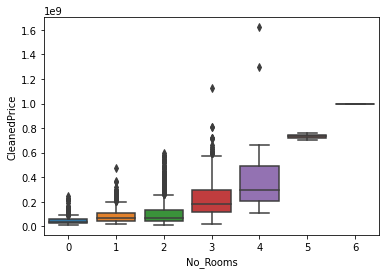

In [ ]:
sns.boxplot(data = df, x = 'No_Rooms', y = 'CleanedPrice')
plt.show()

Data jadi lebih mudah dilihat dan lebih jelas. Walaupun ada beberapa outlier, tapi dari pendapat saya itu tidak masalah. Yang menjadi pertanyaan adalah apakah ada apartemen tanpa kamar tidur? Karena banyak data yang memiliki kamar tidur = 0. Jika dicheck kembali kira2 ada sekian:

In [ ]:
df['No_Rooms'].value_counts()

2    2567
0    1112
1     990
3     612
4      18
5       2
6       1
Name: No_Rooms, dtype: int64

Bisa dilihat dari hasil data di atas bahwa ada sekitar 1112 yang tidak memiliki kamar tidur sama sekali. Jika saya menjadi seorang Data Scientist di tempat tersebut saya akan menanyakan apakah data tersebut benar adanya atau tidak. Karena kalau diasumsikan salah input, terlalu banyak data yang salah input.

### Nomor 3:

Untuk menganalisa kolom latitude dan longitude kita bisa menggunakan scatter plot untuk menemukan outlier-outlier yang mungkin ada di sana. Saya juga menambahkan kolom region untuk menjelaskan lebih detail data-data tersebut.

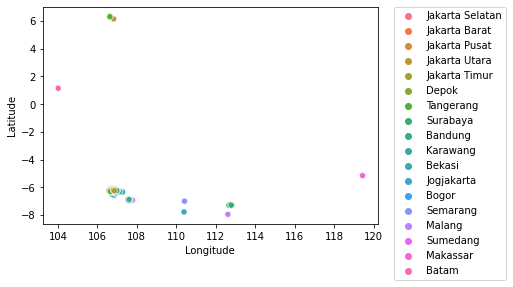

In [ ]:
sns.scatterplot(data = df, x ='Longitude', y = 'Latitude', hue = 'Region')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Saya mengasumsikan terdapat beberapa outlier setelah memvisualisasikan kolom latitude dan longitude. Contohnya beberapa region seperti Jakarta Pusat, Tangerang, Batam, dan Makassar.

Jika dilihat lebih jauh untuk kolom Longitude, Makassar merupakan outlier di dalam kolom tersebut. Tapi hal itu bisa dijelaskan karena Makassar memang bukan terletak di pulau Jawa melainkan Sulawesi. Maka dari itu Longitudenya berbeda begitu jauh.

In [ ]:
df[df['Region'].str.contains('Makassar')]

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
1499,Vida View Makassar 2BR View Kolam renang garde...,2,1,Panakkukang,Makassar,119.441818,-5.15505,1,42.0,Tower Ashton,17,IDR,60000000,60000000


### Nomor 4:

Dan untuk kolom latitude ada 3 outlier yang begitu kentara. Yaitu Batam, Jakarta Pusat, dan Tangerang.

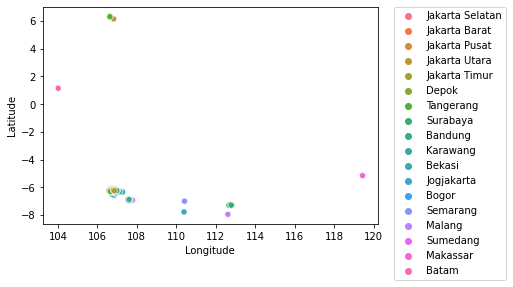

In [ ]:
sns.scatterplot(data = df, x ='Longitude', y = 'Latitude', hue = 'Region')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Saya akan melihat apakah nilai 6 pada latitude adalah sebuah outlier apa bukan.
Saya membandingkan data2 yang memiliki nilai 6 dengan dan yang -6. Apakah ada perbedaan antara 'Region' dan 'Locality'nya.

In [ ]:
df.nlargest(n=10, columns = 'Latitude')

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
951,B Residence BSD 1BR Tower lotus,0,1,BSD City,Tangerang,106.638100,6.304300,1,26.0,Tower lotus,20,IDR,40000000,40000000
1140,B Residence BSD Studio Non Furnished,0,1,BSD City,Tangerang,106.638100,6.304300,0,20.0,Tower Rose,17,IDR,40000000,40000000
2343,B Residence BSD Studio Fully Furnished,0,1,BSD City,Tangerang,106.638100,6.304300,1,25.0,Tower Tulip,20,IDR,55000000,55000000
3142,B Residence BSD Studio Furnished,0,1,BSD City,Tangerang,106.638100,6.304300,1,25.0,Tower Tulip,18,IDR,55000000,55000000
3174,B Residence BSD Studio View AEON Mall,0,1,BSD City,Tangerang,106.638100,6.304300,1,22.0,Tower Tulip,18,IDR,45000000,45000000
4468,B Residence BSD Studio Furnished,0,1,BSD City,Tangerang,106.638100,6.304300,1,26.0,Tower Tulip,19,IDR,60000000,60000000
826,Best Western Mangga Dua Studio View City,0,1,Mangga Dua,Jakarta Pusat,106.827261,6.139958,1,33.0,Tower 1,18,IDR,48000000,48000000
1666,Nagoya Mansion Apartment Studio Tower B,0,1,Lubuk Baja,Batam,104.014900,1.143400,1,28.0,Tower B,12,IDR,72000000,72000000
1499,Vida View Makassar 2BR View Kolam renang garde...,2,1,Panakkukang,Makassar,119.441818,-5.155050,1,42.0,Tower Ashton,17,IDR,60000000,60000000
1005,Bandara City Apartment 1BR Fully Furnished,1,1,Duri Kosambi,Jakarta Barat,106.691800,-6.092000,1,32.0,Tower Emerald,15,IDR,29000000,29000000


Dapat dilihat bahwa mostly data2 yang memiliki latitude 6 ada di locality BSD City, 1 di Mangga Dua, dan 1 di Lubuk Baja. Kita bisa memastikan apakah data-data yang lain yang memiliki locality yang sama memiliki latitude yang tipikal.

In [ ]:
df[df['Locality'].str.contains('BSD City')]

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
29,Branz BSD Apartment 1BR Tower West,1,1,BSD City,Tangerang,106.642300,-6.300200,1,43.0,Tower West,6,IDR,80000000,80000000
113,SkyView Apartment Studio Fully Furnished,0,1,BSD City,Tangerang,106.683509,-6.295373,1,24.0,Tower -,20,IDR,50000000,50000000
149,Roseville SOHO & Suites Studio Fully Furnished,0,1,BSD City,Tangerang,106.664000,-6.294400,1,28.0,Tower East,13,IDR,45000000,45000000
267,Casa De Parco Apartment 1BR Fully Furnished,1,1,BSD City,Tangerang,106.652113,-6.306400,1,42.0,Tower Magnolia,17,IDR,45000000,45000000
276,Casa De Parco Apartment 1BR View East,1,1,BSD City,Tangerang,106.652113,-6.306400,1,34.0,Tower Magnolia,21,IDR,50000000,50000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4769,Casa De Parco Apartment Studio View Shop houses,0,1,BSD City,Tangerang,106.652113,-6.306400,0,26.0,Tower Gardenia,18,IDR,40000000,40000000
4820,Branz BSD Apartment 2BR View city,2,1,BSD City,Tangerang,106.642300,-6.300200,1,62.0,Tower East,16,IDR,180000000,180000000
4872,Casa De Parco Apartment 2BR View Sky Garden,2,1,BSD City,Tangerang,106.652113,-6.306400,1,43.0,Tower Gardenia,21,IDR,70000000,70000000
5054,Roseville SOHO & Suites 1BR Fully Furnished,1,1,BSD City,Tangerang,106.664000,-6.294400,1,40.0,Tower west,15,IDR,65000000,65000000


Untuk BSD City ternyata data yang lain adalah -6 latitude, dan hanya beberapa yang 6. Menurut saya kemungkinan itu salah input karena perbedaan -6 derajat dan 6 derajat di peta itu sangatlah jauh.

In [ ]:
df[df['Locality'].str.contains('Mangga Dua')]

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
826,Best Western Mangga Dua Studio View City,0,1,Mangga Dua,Jakarta Pusat,106.827261,6.139958,1,33.0,Tower 1,18,IDR,48000000,48000000


Untuk Mangga Dua, walaupun ia cuma sendiri tetapi menurut saya ini juga termasuk salah input karena seperti yang saya bilang sebelumnya perbedaan -6 dan 6 itu sangat jauh, dan Jakarta Pusat dengan Jakarta2 yang lain harusnya tidak begitu jauh.

In [ ]:
df[df['Region'].str.contains('Batam')]

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
1666,Nagoya Mansion Apartment Studio Tower B,0,1,Lubuk Baja,Batam,104.0149,1.1434,1,28.0,Tower B,12,IDR,72000000,72000000


Dan untuk Batam, kemungkinan itu adalah nilai sebenarnya karena memang berbeda dengan persebaran utama data yang berada di Jabodetabek. Jadi memungkinkan latitudenya memang berbeda jauh.

### Nomor 5:

Saya membuat linear regression yang sederhana sesuai dengan yang Mas Grady ajarkan.

#Train Test Split#


---



In [ ]:
from sklearn.model_selection import train_test_split

x = df[['Area', 'Total_Facilities', 'No_Rooms']]
y = df[['CleanedPrice']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)

In [ ]:
x_train

,Area,Total_Facilities,No_Rooms
802,30.0,18,0
5276,125.0,24,2
4223,63.0,21,2
158,35.0,15,1
4446,21.0,16,1
...,...,...,...
3330,21.0,19,0
70,35.0,20,2
132,155.0,21,3
2014,45.0,17,2


In [ ]:
y_train

,CleanedPrice
802,60000000
5276,356450000
4223,90000000
158,38000000
4446,35000000
...,...
3330,26500000
70,37500000
132,390600000
2014,42000000


# Train a Model on a Training Set

---



In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

# Test Model on Test Set

---



In [ ]:
y_prediction = model.predict(x_test)

In [ ]:
y_prediction_plot = pd.DataFrame(y_prediction)[0].values

In [ ]:
y_test_plot = y_test['CleanedPrice'].values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


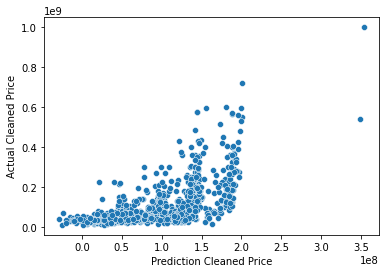

In [ ]:
ax = sns.scatterplot(y_prediction_plot, y_test_plot)
ax.set_xlabel('Prediction Cleaned Price')
ax.set_ylabel('Actual Cleaned Price')
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
print('TEST SET EVALUATION')
print('===================')
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_prediction))}')
print(f'R Squared Score: {r2_score(y_test, y_prediction)}')

TEST SET EVALUATION
Root Mean Squared Error: 85982253.85328783
R Squared Score: 0.29936048297866336


In [ ]:
r2_data = pd.DataFrame()
r2_data['prediksi'] = y_prediction_plot
r2_data['aktual'] = y_test_plot
r2_data['selisih'] = np.abs(y_prediction_plot - y_test_plot)
r2_data['selisih_kuadrat'] = r2_data['selisih'] * r2_data['selisih']

In [ ]:
r2_data['rata_rata_aktual'] = r2_data['aktual'].mean()
r2_data['selisih_aktual_dan_rata_ratanya'] = np.abs(r2_data['aktual'] - r2_data['rata_rata_aktual'])

In [ ]:
r2_data['selisih_aktual_kuadrat'] = r2_data['selisih_aktual_dan_rata_ratanya'] * r2_data['selisih_aktual_dan_rata_ratanya']

In [ ]:
r2_data

,prediksi,aktual,selisih,selisih_kuadrat,rata_rata_aktual,selisih_aktual_dan_rata_ratanya,selisih_aktual_kuadrat
0,1.458946e+07,18900000,4.310538e+06,1.858074e+13,1.047583e+08,8.585829e+07,7.371647e+15
1,8.988930e+07,60000000,2.988930e+07,8.933700e+14,1.047583e+08,4.475829e+07,2.003305e+15
2,1.329151e+08,144000000,1.108488e+07,1.228746e+14,1.047583e+08,3.924171e+07,1.539911e+15
3,6.522175e+07,40000000,2.522175e+07,6.361364e+14,1.047583e+08,6.475829e+07,4.193637e+15
4,1.325681e+08,48000000,8.456811e+07,7.151764e+15,1.047583e+08,5.675829e+07,3.221504e+15
...,...,...,...,...,...,...,...
1056,1.352172e+08,175000000,3.978280e+07,1.582671e+15,1.047583e+08,7.024171e+07,4.933897e+15
1057,3.625471e+07,24000000,1.225471e+07,1.501779e+14,1.047583e+08,8.075829e+07,6.521902e+15
1058,1.284117e+08,32500000,9.591166e+07,9.199047e+15,1.047583e+08,7.225829e+07,5.221261e+15
1059,1.288532e+08,37000000,9.185318e+07,8.437006e+15,1.047583e+08,6.775829e+07,4.591186e+15


In [ ]:
total_1 = r2_data['selisih_kuadrat'].sum()
total_2 = r2_data['selisih_aktual_kuadrat'].sum()

In [ ]:
1 - total_1/total_2

0.29936048297866336

In [ ]:
training_prediction = model.predict(x_train)
print('TRAIN SET EVALUATION')
print('===================')
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, training_prediction))}')
print(f'R Squared Score: {r2_score(y_train, training_prediction)}')

TRAIN SET EVALUATION
Root Mean Squared Error: 90453879.89716452
R Squared Score: 0.23827430140329886


Sepemahan saya, hasil RMSE dan R2 pada regresi linear menggambarkan model yang saya buat saat ini adalah poor atau mungkin tidak akurat.